# SUPERSTORE SALES ANALYSIS

### Exploratory Data Analysis ( EDA ) using python, Pandas and Matplotlib
---

**Objective**
To analyze the Superstore dataset and uncover insgihts about sales performance, profit trends , and key business factors across different regions and product categories

In [7]:
# Basic Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

pd.set_option('display.max_columns',None)

## Loading Dataset and Quick overview of dataset

In [12]:
data = pd.read_csv('Sample_Superstore.csv', encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

from the above output we can deduce that there are no null values in any column inside this dataframe

In [20]:
data.drop_duplicates(inplace=True)

# This line of code drops any duplicate present inside the dataframe

### Overall performance 

In [28]:
total_sales = round(data['Sales'].sum(),2)
print(f"Total Sales = {total_sales}")

total_profits = round(data['Profit'].sum(),2)
print(f"Total Profit = {total_profits}")


Total Sales = 2297200.86
Total Profit = 286397.02


### Sales by region

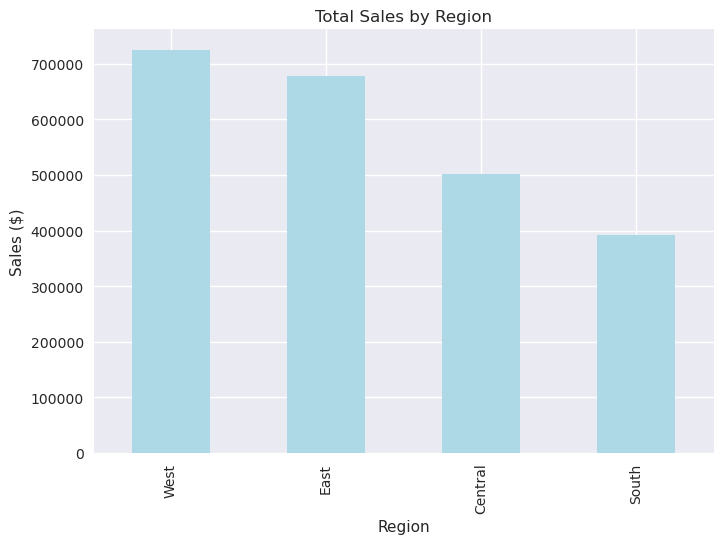

In [32]:
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color = 'lightblue')
plt.title('Total Sales by Region')
plt.ylabel('Sales ($)')
plt.show()

- The above graph gives us information about number of sales per region
- From the above graph, we can deduce that majority of sales happen in the West and East regions
- Central and South comes in 3rd and 4th place respectively



### Sales by Category

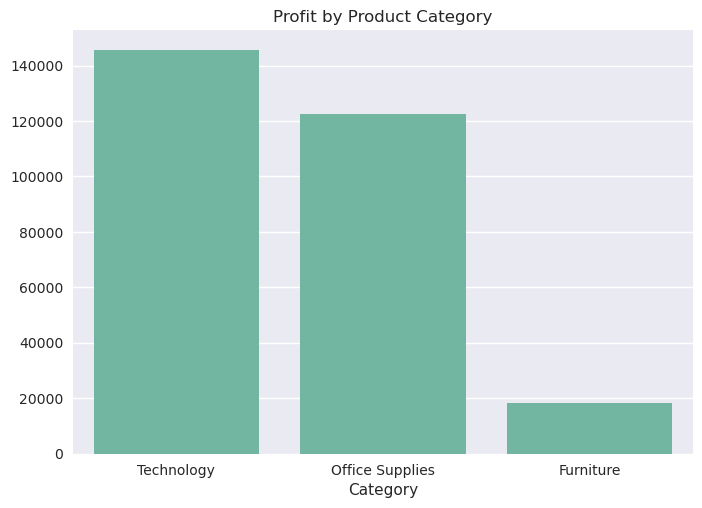

In [34]:
category_profit = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x = category_profit.index, y = category_profit.values)
plt.title("Profit by Product Category")
plt.show()

- This plot shows us which Product category brings in more profit
- Currently Technology is leading this battle with office supplies being very close behind
- we also observe that Furniture sector is not doing so well 

### Discount vs Profit Relationship

In [39]:
round(data['Discount'].corr(data['Profit']),2)

# we can see that we are getting a negitive correlation between Discounts and profits, further proving our point

np.float64(-0.22)

Text(0.5, 1.0, 'Discount vs Profit: Higher Discounts reduce profitability')

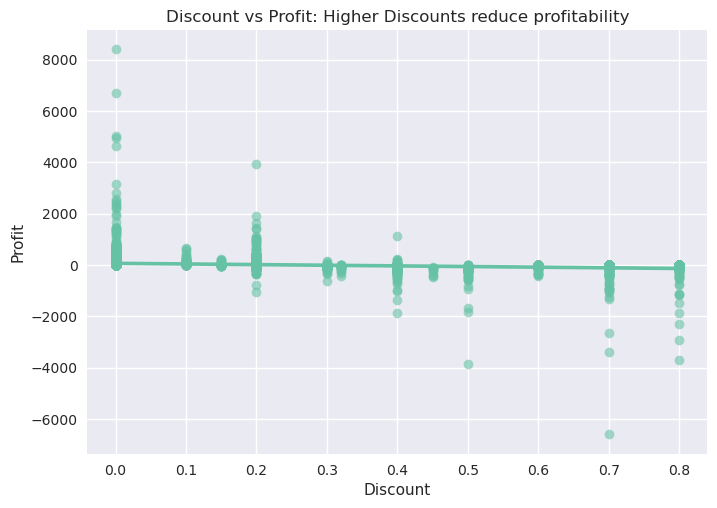

In [41]:
sns.regplot(x= 'Discount' , y = 'Profit', data = data, scatter_kws= {'alpha' : 0.6})
plt.title("Discount vs Profit: Higher Discounts reduce profitability")


- When Discounts are 0, profit values are mostly high and positive , even going above 8k
- As Discounts increase, profit tends to decrease and at high discount levels. profit often becomes negitive
- Moderate to high discounts are hurting profitability
- While discounts might boost sales, they are likely cutting margins significantly
- ideal strategy is to optimize discount levels

### Time Trend

In [47]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

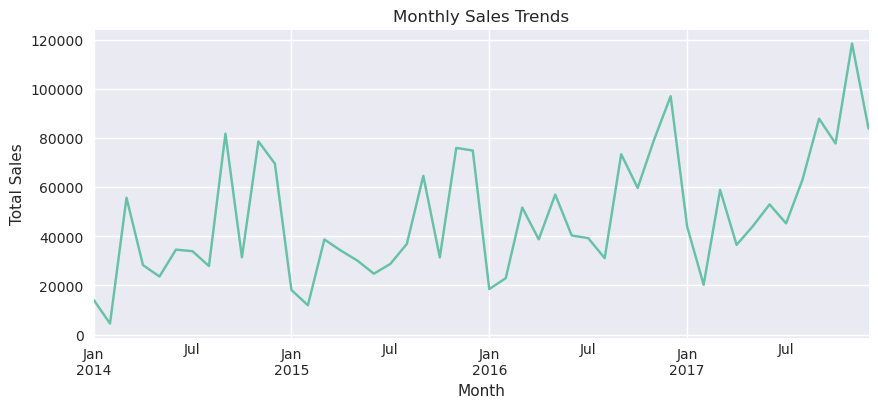

In [49]:
monthly_sales = data.resample("ME", on = 'Order Date')['Sales'].sum()
monthly_sales.plot(figsize = (10,4), title = 'Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

- This line chart above shows the month-wise total sales over the period from **2014 to 2017** 
- Sales vales exhibit a **repetitive seasonal pattern**, with noticeable peaks **near the ends of each year**, indicating possible holiday or end-of-year sale spikes.
- It's a overall **upward** trend, suggesting a consistent growth in sales performance over time
